# Técnica da camada equivalente aplicada ao processamento e interpretação de dados gravimétricos

Este código utiliza a biblioteca de modelagem e inversão de dados geofísicos denominada [Fatiando a Terra](http://www.fatiando.org/index.html) para exemplificar a aplicação da técnica da camada equivalente (Dampney, 1969; Emilia, 1973; Silva, 1986; Leão e Silva, 1989; Li e Oldenburg, 2010; Barnes e Lumley, 2011; Oliveira Jr. et al., 2013; Li et al., 2014) ao processamento e interpretação de dados gravimétricos.

* Dampney, C. N. G., 1969, The equivalent source technique: GEOPHYSICS, 34, 39-53. doi: [10.1190/1.1439996](http://dx.doi.org/10.1190/1.1439996)

* Emilia, D. A., 1973, Equivalent sources used as an analytic base for processing total magnetic field profiles: GEOPHYSICS, 38, 339-348. doi: [10.1190/1.1440344](http://dx.doi.org/10.1190/1.1440344)

* Silva, J. B. C., 1986, Reduction to the pole as an inverse problem and its application to low-latitude anomalies: GEOPHYSICS, 51, 369-382. doi: [10.1190/1.1442096](http://dx.doi.org/10.1190/1.1442096)

* Leão, J. W. D., e J. B. C. Silva, 1989, Discrete linear transformations of potential field data: GEOPHYSICS, 54, 497-507. doi: [10.1190/1.1442676](http://dx.doi.org/10.1190/1.1442676)

* Li, Y., e D. W. Oldenburg, 2010, Rapid construction of equivalent sources using wavelets: GEOPHYSICS, 75, L51-L59. doi: [10.1190/1.3378764](http://dx.doi.org/10.1190/1.3378764)

* Barnes, G., e J. Lumley, 2011, Processing gravity gradient data: GEOPHYSICS, 76, I33-I47. doi: [10.1190/1.3548548](http://dx.doi.org/10.1190/1.3548548)

* Oliveira Jr., V. C., V. C. F. Barbosa, e L. Uieda, 2013, Polynomial equivalent layer: GEOPHYSICS, 78, G1-G13. doi: [10.1190/geo2012-0196.1](http://dx.doi.org/10.1190/geo2012-0196.1)

* Li, Y., M. Nabighian, e D. W. Oldenburg, 2014, Using an equivalent source with positivity for low-latitude reduction to the pole without striation: GEOPHYSICS, 79, J81-J90. doi: [10.1190/geo2014-0134.1](http://dx.doi.org/10.1190/geo2014-0134.1)

In [1]:
%matplotlib inline
import numpy as np
from fatiando import mesher, gridder, utils
from fatiando.gravmag import sphere, prism
from fatiando.gravmag.eqlayer import EQLGravity
from fatiando.inversion.regularization import Damping, LCurve
from fatiando.vis import mpl
from fatiando.constants import SI2EOTVOS, SI2MGAL

### Pontos onde são calculados os dados

In [2]:
shape = (60, 60) # número de dados ao longo de x e y
N = shape[0]*shape[1] # número de dados
area = [-3000, 3000, -3000, 3000] # x mínimo, x máximo, y mínimo e y máximo da área
xp, yp, zp = gridder.regular(area, shape, z=-100) # grade regular localizada em z = -100 m

xc = 0.5*(area[1] + area[0])
yc = 0.5*(area[3] + area[2])

dx, dy = gridder.spacing(area, shape)

In [3]:
print dx
print dy

101.694915254
101.694915254


### Corpos sintéticos

In [4]:
rhos = 2000.

model = [mesher.Prism(-500., 500., -500., 500., 10., 1010., \
                      {'density': rhos})]

In [5]:
# Projeção horizontal dos corpos
projecao = []
for i, p in enumerate(model):
    projecao.append(p.get_bounds()[:4])

### Componente vertical da atração gravitacional (em mGal)

In [6]:
gz = prism.gz(xp, yp, zp, model)

### Componentes do tensor gradiente

In [7]:
gxx = prism.gxx(xp, yp, zp, model)
gxy = prism.gxy(xp, yp, zp, model)
gxz = prism.gxz(xp, yp, zp, model)
gyy = prism.gyy(xp, yp, zp, model)
gyz = prism.gyz(xp, yp, zp, model)
gzz = prism.gzz(xp, yp, zp, model)

### Plot dos dados

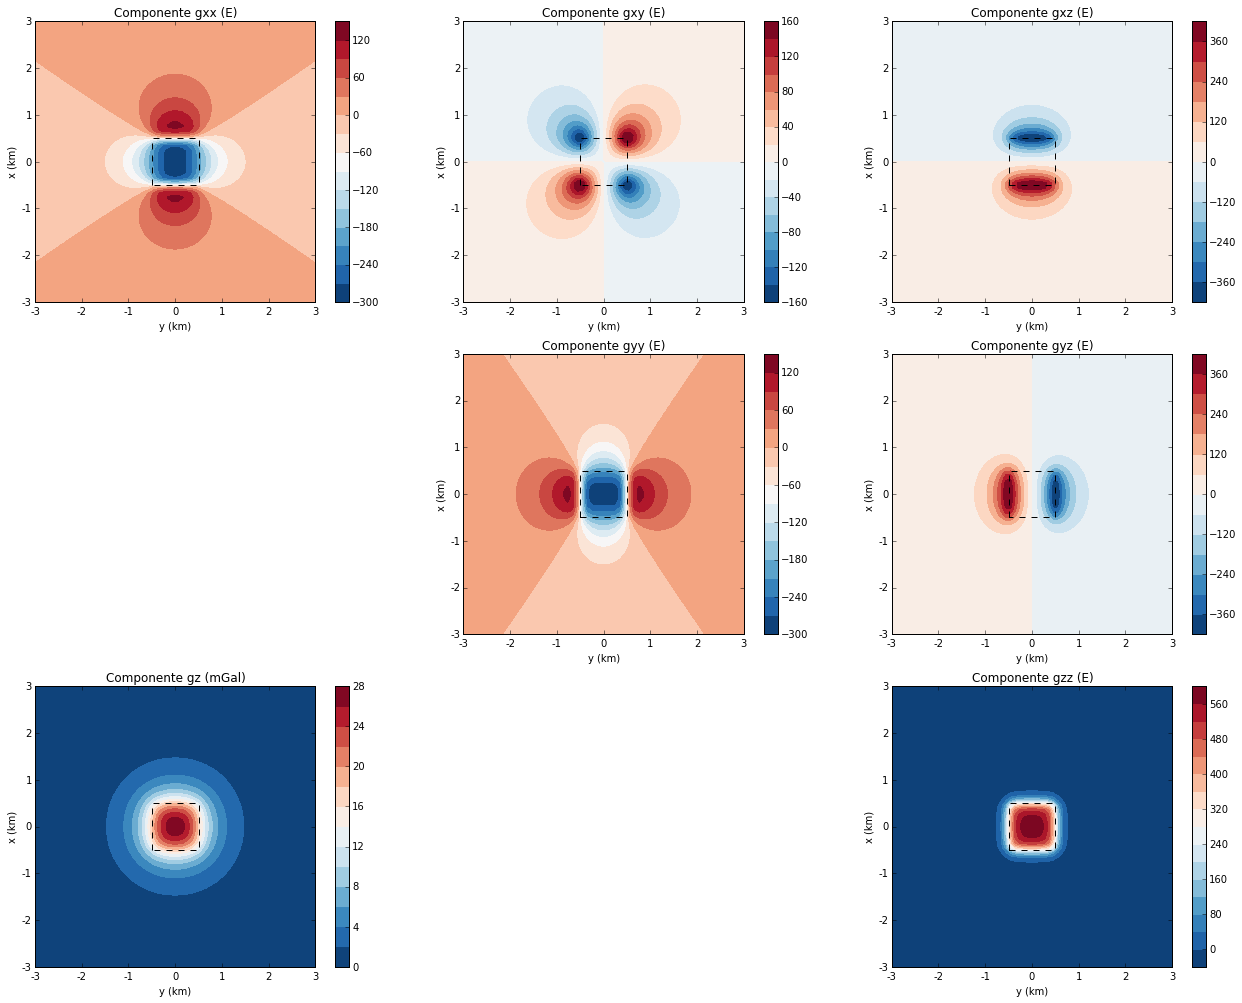

In [8]:
mpl.close('all')
mpl.figure(figsize=(18,14))

mpl.subplot(3,3,1)
mpl.title("Componente gxx (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gxx, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,2)
mpl.title("Componente gxy (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gxy, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,3)
mpl.title("Componente gxz (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gxz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,5)
mpl.title("Componente gyy (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gyy, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,6)
mpl.title("Componente gyz (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gyz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,9)
mpl.title("Componente gzz (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gzz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,7)
mpl.title("Componente gz (mGal)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.tight_layout()

mpl.show()

### Construção de uma camada equivalente

In [9]:
#h = 3.*0.5*(dx+dy)
h = np.max(zp) + 200.
camada = mesher.PointGrid(area, h, shape)

In [10]:
ajuste = EQLGravity(xp, yp, zp, gz, camada)

In [11]:
f0 = np.trace(ajuste.hessian(None))/ajuste.nparams

In [12]:
regularizacao = Damping(camada.size)

In [13]:
inversao = LCurve(ajuste, regularizacao, [f0*(10.**i) for i in range(-15, -1)]).fit()

In [14]:
camada.addprop('density', inversao.estimate_)

In [15]:
gz_pre = inversao.predicted()

### Ajuste

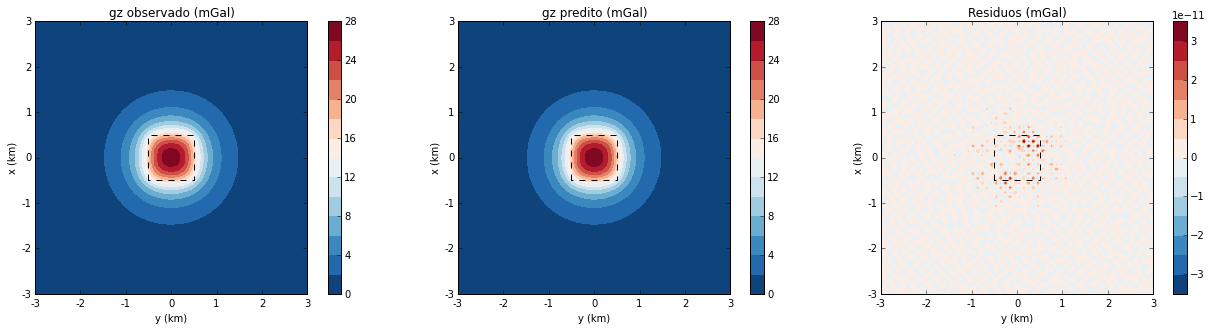

In [16]:
mpl.close('all')
mpl.figure(figsize=(18,4.5))

mpl.subplot(1,3,1)
mpl.title("gz observado (mGal)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(1,3,2)
mpl.title("gz predito (mGal)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gz_pre, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(1,3,3)
mpl.title("Residuos (mGal)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gz_pre - gz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.tight_layout()

mpl.show()

### Continuação para cima

In [17]:
dado_cont_verdadeiro = prism.gz(xp, yp, zp - 300., model)

In [18]:
dado_cont_calculado = sphere.gz(xp, yp, zp - 300., camada)

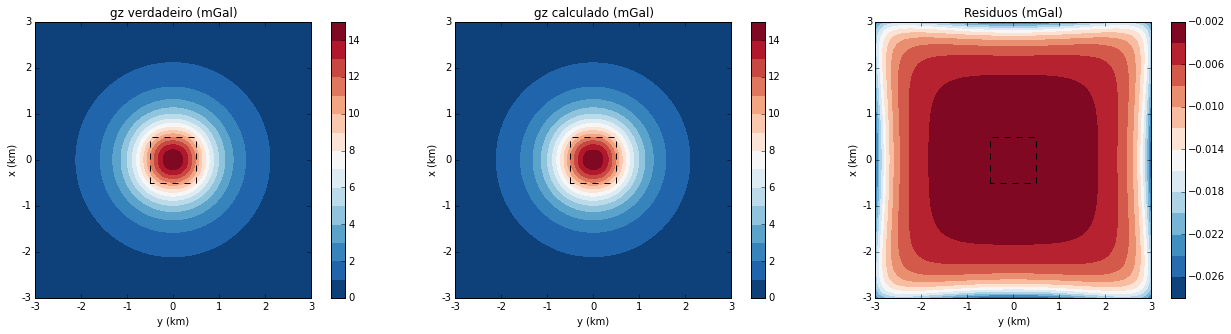

In [19]:
mpl.close('all')
mpl.figure(figsize=(18,4.5))

mpl.subplot(1,3,1)
mpl.title("gz verdadeiro (mGal)")
mpl.axis('scaled')
mpl.contourf(yp, xp, dado_cont_verdadeiro, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(1,3,2)
mpl.title("gz calculado (mGal)")
mpl.axis('scaled')
mpl.contourf(yp, xp, dado_cont_calculado, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(1,3,3)
mpl.title("Residuos (mGal)")
mpl.axis('scaled')
mpl.contourf(yp, xp, dado_cont_calculado - dado_cont_verdadeiro, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.tight_layout()

mpl.show()

### Cálculo de derivadas

#### Derivadas numéricas (diferença central)

In [20]:
delta = 10.

In [21]:
dx_calculada = (sphere.gz(xp + delta, yp, zp, camada) - \
                sphere.gz(xp - delta, yp, zp, camada))/ \
               (2.*delta)
dy_calculada = (sphere.gz(xp, yp + delta, zp, camada) - \
                sphere.gz(xp, yp - delta, zp, camada))/ \
               (2.*delta)
dz_calculada = (sphere.gz(xp, yp, zp + delta, camada) - \
                sphere.gz(xp, yp, zp - delta, camada))/ \
               (2.*delta)

In [22]:
#Transforma as derivadas de mGal/m para Eötvös

dx_calculada *= (SI2EOTVOS/SI2MGAL)
dy_calculada *= (SI2EOTVOS/SI2MGAL)
dz_calculada *= (SI2EOTVOS/SI2MGAL)

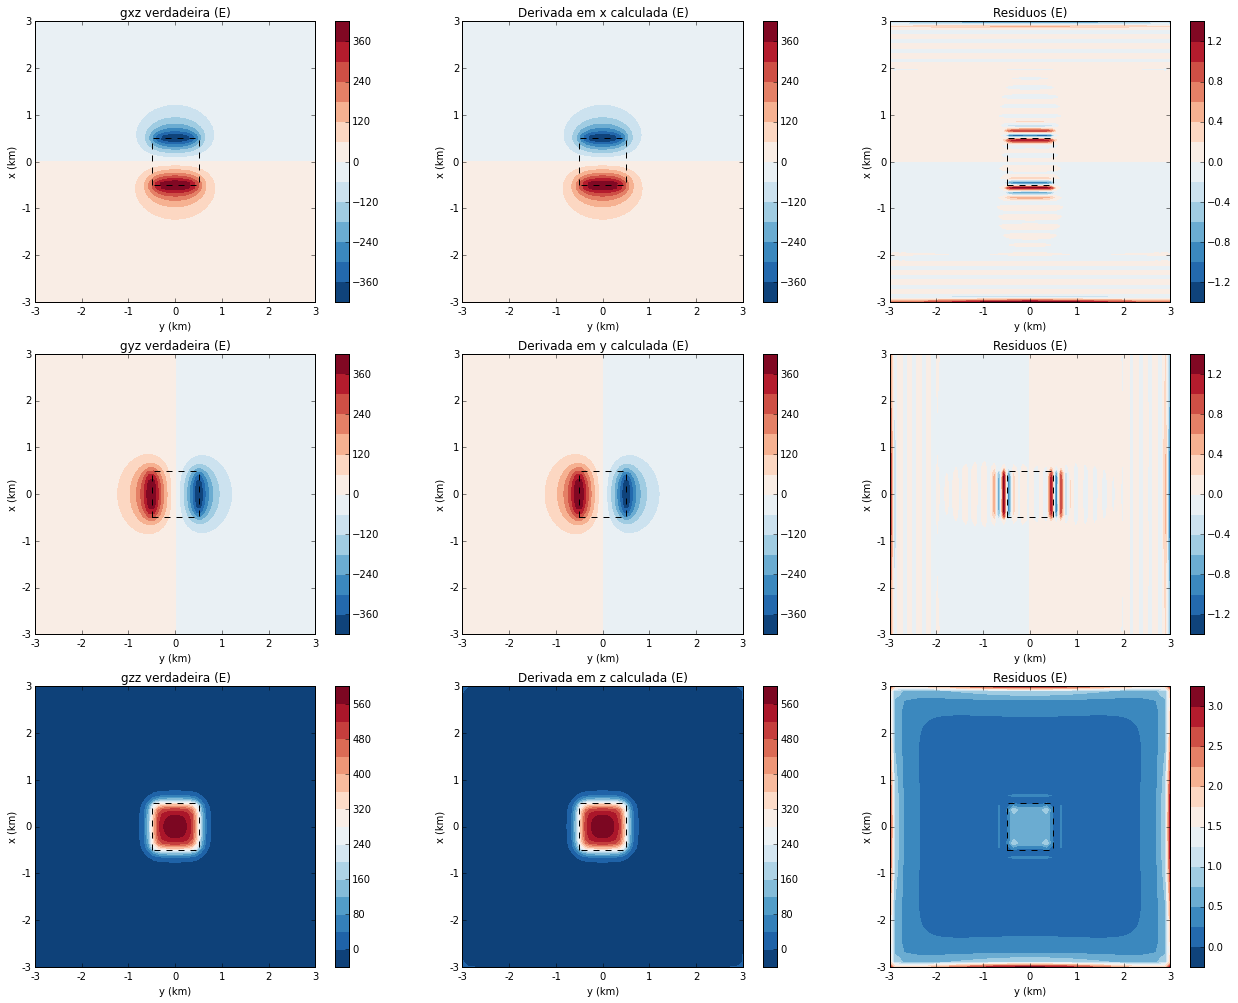

In [23]:
mpl.close('all')
mpl.figure(figsize=(18,14))

mpl.subplot(3,3,1)
mpl.title("gxz verdadeira (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gxz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,2)
mpl.title("Derivada em x calculada (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, dx_calculada, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,3)
mpl.title("Residuos (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, dx_calculada - gxz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,4)
mpl.title("gyz verdadeira (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gyz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,5)
mpl.title("Derivada em y calculada (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, dy_calculada, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,6)
mpl.title("Residuos (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, dy_calculada - gyz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,7)
mpl.title("gzz verdadeira (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gzz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,8)
mpl.title("Derivada em z calculada (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, dz_calculada, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(3,3,9)
mpl.title("Residuos (E)")
mpl.axis('scaled')
mpl.contourf(yp, xp, dz_calculada - gzz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.tight_layout()

mpl.show()